# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\deepi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading Data

In [28]:
df= pd.read_csv('globalterrorismdb_0718dist.csv',encoding="latin1")
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,197203110001,1972,3,11,NaN,0,NaN,217,United States,1,...,The Jewish Resistance Assault Team is likely a...,"""Fire Bombers Said To Pick Wrong Home,"" New Yo...","Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,0.0,0.0,0.0,0.0,NaN
1206,197203120001,1972,3,12,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
1207,197203130001,1972,3,13,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
1208,197203150001,1972,3,15,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN


# Data Preprocessing

In [29]:
df=df.rename(columns={"provstate": "State","region_txt": "Region","country_txt": "Country",
                      "iyear": "Year","imonth": "Month","iday": "Day",
                      "attacktype1_txt": "Attack_Type","nkill": "Killed",
                      "nwound": "Wounded","targtype1_txt": "Target_Type","weaptype1_txt": "Weap_Type",
                      "gname": "Group_Name","target1": "Target_Name"})

In [30]:
data = pd.DataFrame()
data = df[['State','Region','Country','Year','Month','Day','Attack_Type','Killed','Wounded','Target_Type','Weap_Type','Target_Name']]

In [31]:
data

,State,Region,Country,Year,Month,Day,Attack_Type,Killed,Wounded,Target_Type,Weap_Type,Target_Name
0,NaN,Central America & Caribbean,Dominican Republic,1970,7,2,Assassination,1.0,0.0,Private Citizens & Property,Unknown,Julio Guzman
1,Federal,North America,Mexico,1970,0,0,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),Unknown,"Nadine Chaval, daughter"
2,Tarlac,Southeast Asia,Philippines,1970,1,0,Assassination,1.0,0.0,Journalists & Media,Unknown,Employee
3,Attica,Western Europe,Greece,1970,1,0,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Explosives,U.S. Embassy
4,Fukouka,East Asia,Japan,1970,1,0,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Incendiary,U.S. Consulate
...,...,...,...,...,...,...,...,...,...,...,...,...
1205,New York,North America,United States,1972,3,11,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,Incendiary,House of Anna Hermione Ryan
1206,Northern Ireland,Western Europe,United Kingdom,1972,3,12,Assassination,1.0,NaN,Military,Firearms,Foot Patrol
1207,Northern Ireland,Western Europe,United Kingdom,1972,3,13,Assassination,1.0,NaN,Private Citizens & Property,Firearms,"Patrick McCrory, 19, Catholic"
1208,Northern Ireland,Western Europe,United Kingdom,1972,3,15,Assassination,1.0,NaN,Police,Firearms,"William Logam 23, Protestant"


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        1208 non-null   object 
 1   Region       1210 non-null   object 
 2   Country      1210 non-null   object 
 3   Year         1210 non-null   int64  
 4   Month        1210 non-null   int64  
 5   Day          1210 non-null   int64  
 6   Attack_Type  1209 non-null   object 
 7   Killed       1095 non-null   float64
 8   Wounded      973 non-null    float64
 9   Target_Type  1209 non-null   object 
 10  Weap_Type    1209 non-null   object 
 11  Target_Name  1181 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 113.6+ KB


In [33]:
data.nunique()

State           126
Region           11
Country          47
Year              3
Month            13
Day              32
Attack_Type       9
Killed           12
Wounded          18
Target_Type      21
Weap_Type         8
Target_Name    1064
dtype: int64

In [34]:
data.isnull().sum()

State            2
Region           0
Country          0
Year             0
Month            0
Day              0
Attack_Type      1
Killed         115
Wounded        237
Target_Type      1
Weap_Type        1
Target_Name     29
dtype: int64

In [35]:
data['State'] =  data['State'].fillna(0)
#df['city'] =  df['city'].fillna(df['city'].mean)
#df['latitude'] =  df['latitude'].fillna(df['latitude'].mean)
#df['longitude'] =  df['longitude'].fillna(df['longitude'].mean)
data['Killed'] =  data['Killed'].fillna(0)
data['Wounded'] =  data['Wounded'].fillna(0)
data['Target_Name'] =  data['Target_Name'].fillna(0)
data['Attack_Type'] =  data['Attack_Type'].fillna(0)
data['Target_Type'] =  data['Target_Type'].fillna(0)
data['Weap_Type'] =  data['Weap_Type'].fillna(0)


C:\Users\deepi\AppData\Local\Temp\ipykernel_5100\1564831120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] =  data['State'].fillna(0)
C:\Users\deepi\AppData\Local\Temp\ipykernel_5100\1564831120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Killed'] =  data['Killed'].fillna(0)
C:\Users\deepi\AppData\Local\Temp\ipykernel_5100\1564831120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [10]:
data.isnull().sum()

State          0
Region         0
Country        0
Year           0
Month          0
Day            0
Attack_Type    0
Killed         0
Wounded        0
Target_Type    0
Weap_Type      0
Target_Name    0
dtype: int64

# Exploratory Data Analysis

In [11]:
corre= data.corr()
corre


,Year,Month,Day,Killed,Wounded
Year,1.000000,-0.223723,-0.042627,0.074566,0.082190
Month,-0.223723,1.000000,0.033867,-0.001919,-0.027484
Day,-0.042627,0.033867,1.000000,0.030316,-0.047854
Killed,0.074566,-0.001919,0.030316,1.000000,0.048472
Wounded,0.082190,-0.027484,-0.047854,0.048472,1.000000


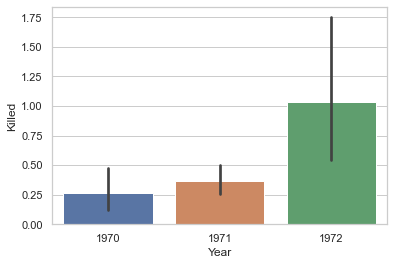

In [96]:
sns.barplot(x='Year',y='Killed',data=data)
sns.set(style="whitegrid")

In [36]:
data['Total_Casualties'] = data['Killed'] + data['Wounded']


C:\Users\deepi\AppData\Local\Temp\ipykernel_5100\3789434734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_Casualties'] = data['Killed'] + data['Wounded']


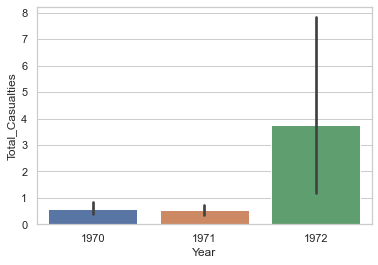

In [99]:
sns.barplot(x='Year', y='Total_Casualties',data=data)
sns.set(style="whitegrid")

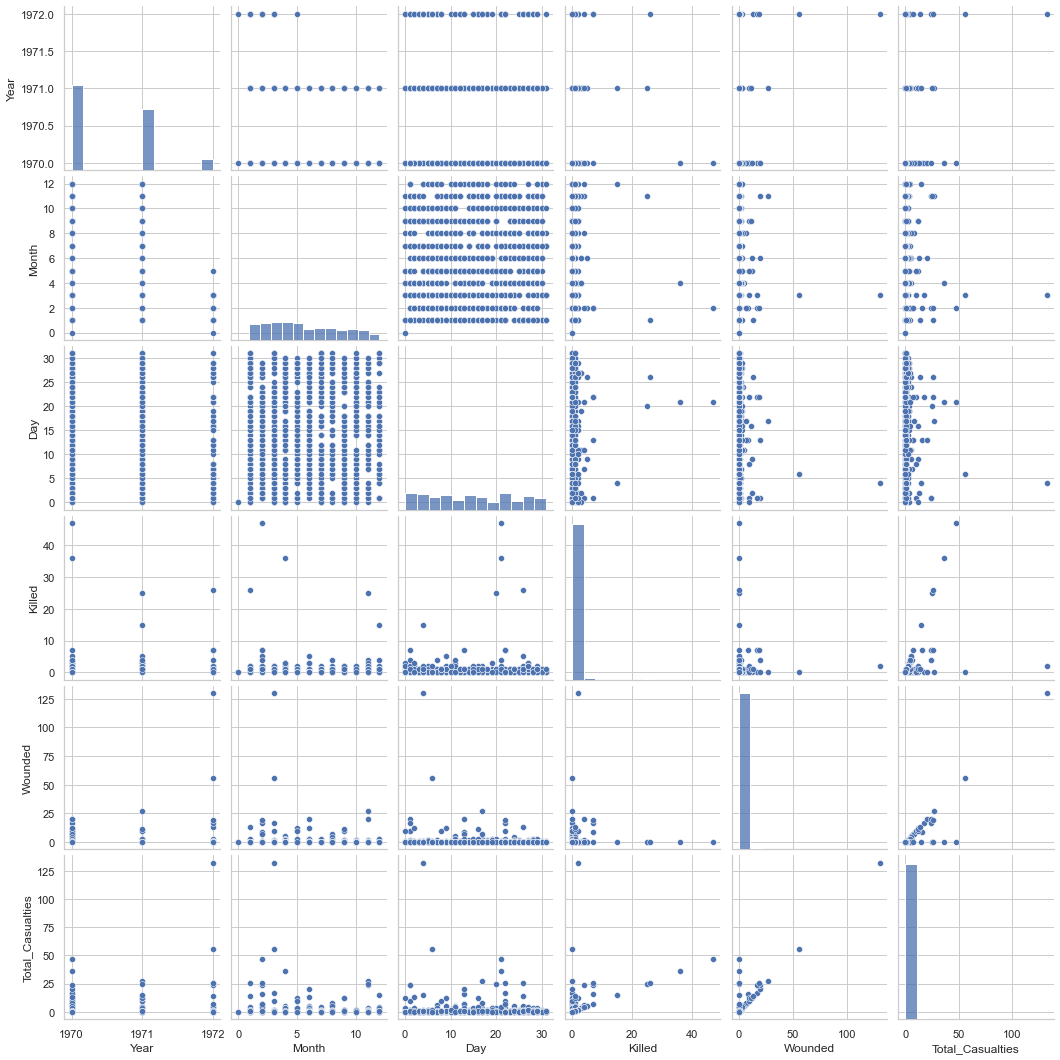

In [100]:
sns.pairplot(data)


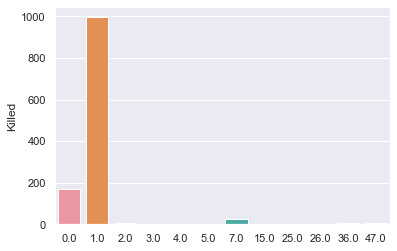

In [93]:
sns.barplot(x=data['Killed'].unique(),y=data['Killed'].value_counts(),data=data)
sns.set(style="whitegrid")

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


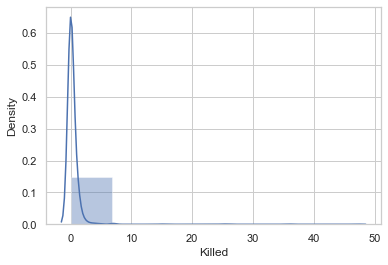

In [94]:
sns.distplot(data['Killed'],bins = 7)
sns.set(style="whitegrid")

In [ ]:
#grouping the columns for better understanding and clear visualization of data

In [51]:
yr=data[['Total_Casualties','Year']].groupby('Year').sum()

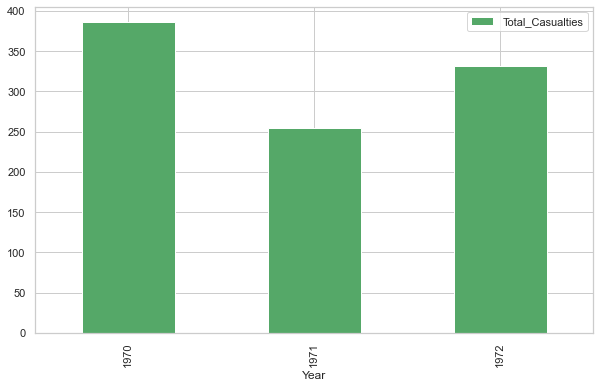

In [91]:
yr.plot(kind='bar',figsize=(10,6),color='g')
sns.set(style="darkgrid")

In [53]:
wt=data[['Total_Casualties','Weap_Type']].groupby('Weap_Type').sum()

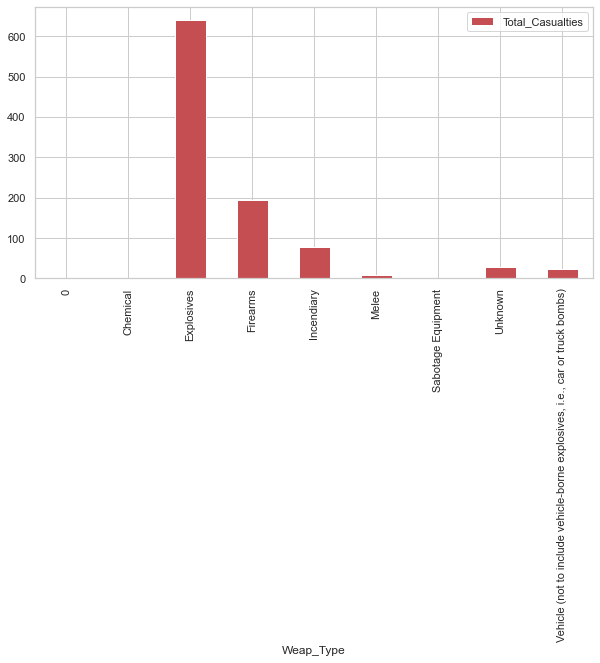

In [88]:
wt.plot(kind='bar',figsize=(10,5),color='r')
sns.set(style="whitegrid")

In [55]:
c=data[['Total_Casualties','Country']].groupby('Country').sum()

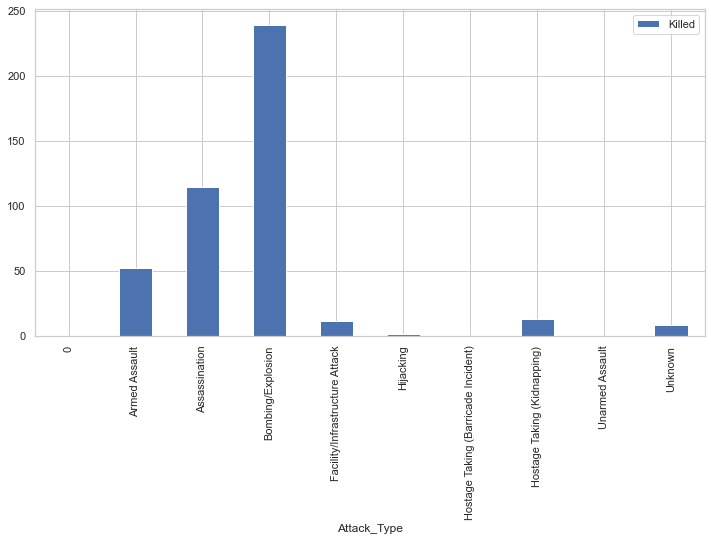

In [87]:
c.plot(kind='bar',figsize=(12,6))
sns.set(style="whitegrid")

<AxesSubplot:xlabel='Attack_Type'>

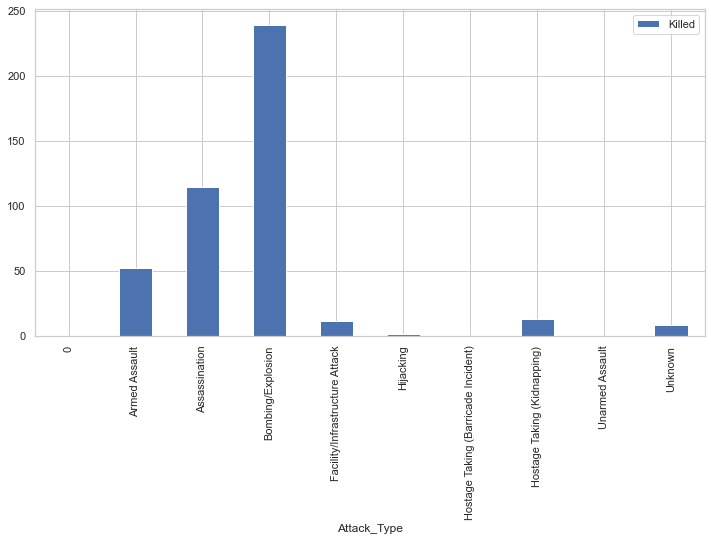

In [86]:
sns.set(style="whitegrid")
kill=data[['Killed','Attack_Type']].groupby('Attack_Type').sum()
kill.plot(kind='bar',figsize=(12,6))

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

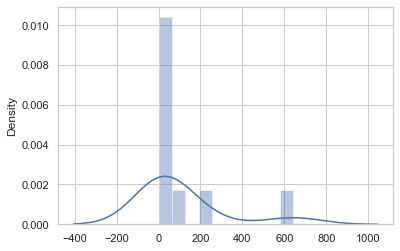

In [85]:
sns.set(style="whitegrid")
sns.distplot(wt,bins=10)